# **Assignment \#1**: Machine Learning MC886
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2020s2



In [1]:
# TODO: RA & Name 
print('RA1: 199538  ' + ' Nome1: Jhessica V. S. Silva')
print('RA2: 201705  ' + ' Nome2: Luana Felipe De Barros')

RA1: 199538   Nome1: Jhessica V. S. Silva
RA2: 201705   Nome2: Luana Felipe De Barros


## Objective 

Explore **linear regression** alternatives and come up with the best possible model to the problems, avoiding overfitting. In particular, predict the **price of diamonds** from their attributes (e.g., depth, clarity, color) using the Diamonds dataset (https://www.kaggle.com/shivam2503/diamonds)

## Dataset

The Diamonds dataset contains the prices and attributes of almost 50,000 diamonds.

Dataset Information: You should respect the following traininig/test split: 45,000 training examples, and 5,000 test examples.

There are 9 attributes as follows: 

- 1: **carat**: weight of the diamond (0.2-5.01)
- 2: **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- 3: **color**: diamond color, from J (worst) to D (best)
- 4: **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- 5: **x**: length in mm (0-10.74)
- 6: **y**: width in mm (0-58.9)
- 7: **z**: depth in mm (0-31.8)
- 8: **depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
- 9: **table**: width of top of diamond relative to widest point (43-95)


target **price**: price in US dollars

The data is available at
https://www.dropbox.com/s/tmz8bkocrpfmfb9/diamonds-dataset.zip


## Deadline

Monday, October 12th 7 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you did, your grade will be penalized as follows:
- October 13th 7 pm : grade * 0.75
- October 14th 7 pm : grade * 0.5
- October 15th 7 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**

## Activities

## 1.
(4 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)



1.1 **Pré-processamento de Dados**

O primeiro passo do nosso trabalho é o tratamento de dados. Nos próximos blocos, importamos os módulos que utilizamos, carregamos o dataset, verificamos se existe elementos nulos, e atribuimos valores númericos para os atributos cut, color e clarity que são do tipo texto.

In [1]:
# TODO: Load and preprocess your dataset.

# importando os modulos 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

!pip install ipython-autotime

%load_ext autotime

time: 0 ns


In [2]:
# carregando o dataset 
df = pd.read_csv("diamonds-train.csv")
df.head(7)

,carat,cut,color,clarity,x,y,z,depth,table,price
0,1.62,Ideal,I,VS2,7.53,7.58,4.69,62.1,55.0,10501
1,0.30,Premium,G,SI1,4.39,4.35,2.57,58.8,60.0,574
2,1.37,Ideal,F,VS1,7.28,7.22,4.32,59.6,57.0,11649
3,0.33,Fair,H,VVS2,4.40,4.32,2.84,65.1,59.0,922
4,0.32,Very Good,F,VS2,4.43,4.48,2.62,58.8,62.0,602
5,0.51,Premium,E,SI2,5.15,5.12,3.22,62.7,52.0,1205
6,1.50,Good,H,VS2,7.22,7.27,4.61,63.6,58.0,10291


time: 157 ms


In [4]:
df.shape

(45000, 10)

time: 0 ns


In [5]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
price      0
dtype: int64

time: 32 ms


Observamos que não existem elementos nulos, então o nosso próximo passo foi transformar as variáveis categóricas em numéricas. Pela descrição do problema, vimos que essas variáveis são ordinais e portanto não precisaríamos fazer o One Hot Encoding.

In [6]:
# Atribuindo valores númericos para as colunas cut, color e clarity 

# cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
diamonts_cut_map = {'Ideal' : 4, 'Premium' : 3 , 'Very Good': 2 , 'Good' : 1 , 'Fair' : 0}

# color: diamond color, from J (worst) to D (best)
diamonts_color_map = {'D' : 6, 'E' : 5 , 'F': 4 , 'G' : 3 , 'H' : 2 , 'I' : 1 , 'J' : 0}

# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
diamonts_clarity_map = {'IF' : 7 , 'VVS1' : 6, 'VVS2' : 5 , 'VS1': 4 , 'VS2' : 3 , 'SI1' : 2 , 'SI2' : 1 , 'I1' : 0}

# Aplicando os mapeamentos ao dataset
df['cut'] = df['cut'].map(diamonts_cut_map)
df['color'] = df['color'].map(diamonts_color_map)
df['clarity'] = df['clarity'].map(diamonts_clarity_map)
df.head()

,carat,cut,color,clarity,x,y,z,depth,table,price
0,1.62,4,1,3,7.53,7.58,4.69,62.1,55.0,10501
1,0.30,3,3,2,4.39,4.35,2.57,58.8,60.0,574
2,1.37,4,4,4,7.28,7.22,4.32,59.6,57.0,11649
3,0.33,0,2,5,4.40,4.32,2.84,65.1,59.0,922
4,0.32,2,4,3,4.43,4.48,2.62,58.8,62.0,602


time: 63 ms


1.2 **Escolha das Features**

Pelo gráfico abaixo, é possível ver a correlação linear entre as variáveis. Observa-se que as variáveis com maior correlação com a variável preço são: carat, x,y e z. No caso, todas essas variáveis possuem correlação positivas. Assim, começamos por elas a escolha das features do nosso modelo. Além disso, incluímos as features que são categóricas porque apesar delas não mostraram alta correlação neste gráfico, acreditamos que isso ocorre devido a nossa transformação manual.


Features escolhidas:
- carat
- x
- y
- z
- cut
- color
- clarity

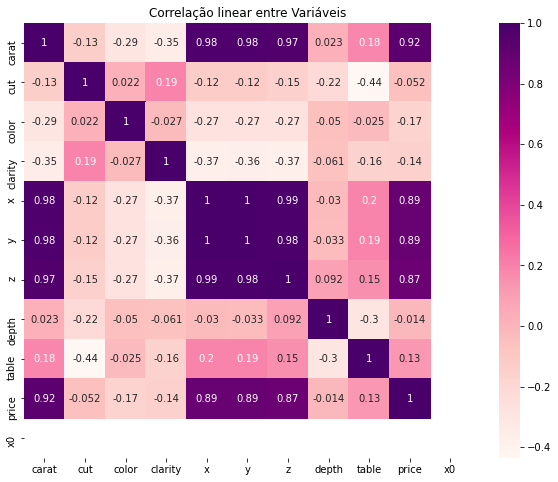

time: 1.75 s


In [52]:
plt.figure(figsize=(10,8))
plt.title('Correlação linear entre Variáveis')
sns.heatmap(df.corr(),annot=True,cmap='RdPu')

In [8]:
# Transformando df em um novo dataset com as features que escolhemos para treinar o nosso modelo:
# e adicionando a coluna correspondente a feature x0
df['x0'] = 1
dfnew = df[['x0','carat', 'cut', 'color', 'clarity', 'x','y','z','price']]
dfnew.head(7)

,x0,carat,cut,color,clarity,x,y,z,price
0,1,1.62,4,1,3,7.53,7.58,4.69,10501
1,1,0.30,3,3,2,4.39,4.35,2.57,574
2,1,1.37,4,4,4,7.28,7.22,4.32,11649
3,1,0.33,0,2,5,4.40,4.32,2.84,922
4,1,0.32,2,4,3,4.43,4.48,2.62,602
5,1,0.51,3,5,1,5.15,5.12,3.22,1205
6,1,1.50,1,2,3,7.22,7.27,4.61,10291


time: 31 ms


In [9]:
# Transformando df em array
data_table = dfnew.to_numpy()

#  Reorganizando todas as colunas, exceto price, em um array x_data, e a coluna price para um array y_data
#  x_data = X (slide)
x_data = data_table[:,:data_table.shape[1]-1]
y_data = data_table[:,data_table.shape[1]-1]
print(x_data)
print(y_data)

[[1.   1.62 4.   ... 7.53 7.58 4.69]
 [1.   0.3  3.   ... 4.39 4.35 2.57]
 [1.   1.37 4.   ... 7.28 7.22 4.32]
 ...
 [1.   0.5  4.   ... 5.1  5.14 3.13]
 [1.   0.33 4.   ... 4.45 4.46 2.77]
 [1.   0.31 3.   ... 4.36 4.32 2.68]]
[10501.   574. 11649. ...  1637.   575.   786.]
time: 0 ns


1.3 **Treino x Validação**

Dividimos o dataset em dois conjuntos: Treino e Validação. 67% dos dados de entrada foram atribuídos para o conjunto de treino, e os dados restantes foram atribuidos para o conjunto de validação.

In [10]:
# Dividindo conjunto de treinos e validação
X_train, X_vad, y_train, y_vad = train_test_split(x_data, y_data, test_size=0.33, random_state=42)
X_train.shape, X_vad.shape

((30150, 8), (14850, 8))

time: 15 ms


In [11]:
# Normalizando os dados
scaler = StandardScaler()
X_train[:,1:] = scaler.fit_transform(X_train[:,1:])
X_vad[:,1:] = scaler.transform(X_vad[:,1:])

time: 47 ms


1.4 **Regressão Linear - Nossa implementação** 

Para fins de análise de resultados, implementamos os seguintes tipos de Descidas de Gradiente: Batch, Mini-Batch e Estocástico. Para facilitar a leitura do cógido, organizamos nossa implementação em uma classe: myLinearRegression().

In [12]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn libraries.
class myLinearRegression():
    
    # Constructor
    def __init__(self, X_vad, y_vad, learning_rate=0.01, GD='batch', epochs=100000, validation=False):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost = []
        self.GD = GD
        self.validation = validation
        self.X_vad = X_vad
        self.y_vad = y_vad
        self.vad_error = []
        
    def validate(self):
        y_predicted = self.predict(self.X_vad)
        self.vad_error.append(mean_squared_error(self.y_vad, y_predicted))
    
    # Batch
    def fit_batch(self, X_train, y_train):
        for k in range(self.epochs):            
            hypothesis = np.dot(X_train, self.theta)
            loss = hypothesis - y_train
            self.cost.append((np.sum(loss ** 2)) / (2 * X_train.shape[0]))
            gradient = np.dot(np.transpose(X_train), loss) / X_train.shape[0]
            self.theta = self.theta - self.learning_rate * gradient
            
            if (self.validation):
                self.validate()
    
    # Mini-batch
    def fit_minibatch(self, X_train, y_train):
        batch_size = 32
        ind = np.zeros(X_train.shape[0])
        X = np.zeros((batch_size, X_train.shape[1]))
        Y = np.zeros((batch_size))
        
        for i in range(X_train.shape[0]):
            ind[i] = i;
            
        for k in range(self.epochs):
            np.random.shuffle(ind)

            for i in range(int(X_train.shape[0]/batch_size)):

                # getting batch
                for j in range(batch_size):
                    X[j] = X_train[int(ind[i*batch_size+j])]
                    Y[j] = y_train[int(ind[i*batch_size+j])]  
                
            
                hypothesis = np.dot(X, self.theta)
                loss = hypothesis - Y
                loss_all = np.dot(X_train, self.theta) - y_train
                self.cost.append((np.sum(loss_all ** 2)) / (2 * X_train.shape[0]))
                gradient = np.dot(np.transpose(X), loss) / X.shape[0]
                self.theta = self.theta - self.learning_rate * gradient
            
                if (self.validation):
                    self.validate()
    
    # Stochastic
    def fit_sto(self, X_train, y_train):
        batch_size = 1
        ind = np.zeros(X_train.shape[0])
        X = np.zeros((batch_size, X_train.shape[1]))
        Y = np.zeros((batch_size))
        
        for i in range(X_train.shape[0]):
            ind[i] = i;
            
        for k in range(self.epochs):
            np.random.shuffle(ind)

            for i in range(X_train.shape[0]): 
                X = X_train[int(ind[i])]
                Y = y_train[int(ind[i])]    
            
                hypothesis = np.dot(X, self.theta)
                loss = hypothesis - Y
                loss_all = np.dot(X_train, self.theta) - y_train
                self.cost.append((np.sum(loss_all ** 2)) / (2 * X_train.shape[0]))
                gradient = np.dot(np.transpose(X), loss) / X.shape[0]
                self.theta = self.theta - self.learning_rate * gradient
            
                if (self.validation):
                    self.validate()
    
    def fit(self, X_train, y_train):
        
        self.theta = np.zeros(X_train.shape[1])
        self.delta_theta = np.zeros(X_train.shape[1])
        
        if (self.GD == 'minibatch'):
            self.fit_minibatch(X_train, y_train)
        elif (self.GD == 'stochastic'):
            self.fit_sto(X_train, y_train)
        else:
            self.fit_batch(X_train, y_train)
        
    def predict(self, X):
        return np.dot(X, self.theta)    

time: 31 ms


1.5 **Treinando nosso modelo e validando o resultado.** 

##### Batch

In [30]:
model_b = myLinearRegression(GD = 'batch', validation = True, X_vad = X_vad, y_vad = y_vad)
model_b.fit(X_train, y_train)
y_predicted = model_b.predict(X_vad)

print('Theta values:')
print(model_b.theta)
print('')

rmse = mean_squared_error(y_vad, y_predicted)
r2 = r2_score(y_vad, y_predicted)
print('Root mean squared error:', rmse)
print('R2 score:', r2)

Theta values:
[ 3924.03250415  5009.93434013   170.38449077   539.24988059
   819.60889468 -1551.99272028   988.43413755  -331.18606305]

Root mean squared error: 1510310.779991972
R2 score: 0.9056063185182286
time: 4min 20s


##### Mini-batch

In [31]:
model_mb = myLinearRegression(GD = 'minibatch', learning_rate= 0.01, epochs = 10, validation = True, X_vad = X_vad, y_vad = y_vad)
model_mb.fit(X_train, y_train)
y_predicted_mb = model_mb.predict(X_vad)

print('Theta values:')
print(model_mb.theta)
print('')

rmse = mean_squared_error(y_vad, y_predicted_mb)
r2 = r2_score(y_vad, y_predicted_mb)
print('Root mean squared error:', rmse)
print('R2 score:', r2)

Theta values:
[3905.73478487 4852.82194968  160.8310055   511.51034103  812.73104914
 -416.18902317   52.46998072 -395.55107143]

Root mean squared error: 1523584.7478234468
R2 score: 0.904776702052477
time: 22.1 s


##### Estocástico

In [32]:
model_st = myLinearRegression(GD = 'stochastic', epochs = 3, validation = True, X_vad = X_vad, y_vad = y_vad)
model_st.fit(X_train, y_train)
y_predicted_st = model_st.predict(X_vad)

print('Theta values:')
print(model_st.theta)
print('')

rmse = mean_squared_error(y_vad, y_predicted_st)
r2 = r2_score(y_vad, y_predicted_st)
print('Root mean squared error:', rmse)
print('R2 score:', r2)

Theta values:
[3912.80937669 4912.35591087  166.25973006  523.42297376  759.59278243
 -485.03861961   50.44934605 -390.11503849]

Root mean squared error: 1526823.3483677811
R2 score: 0.904574291110121
time: 3min 18s


1.6 **Função de Custo x Erro da Validação**

Para fins de análise, apresentamos a seguir três gráficos que mostram o Erro da Validação em relação à Função de Custo das três Descidas de Gradiente implementadas anteriormente. Os gráficos relacionados ao Mini-batch e ao Estocástico apresentam uma linha vertical tracejada que indica o comportamento do algoritmo em cada época. 

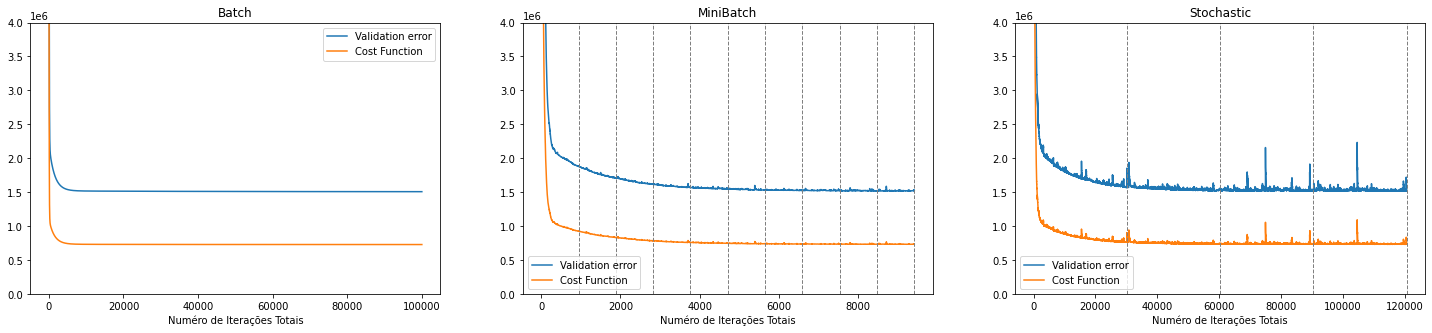

time: 1.93 s


In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))
ax1.plot(model_b.vad_error, label="Validation error")
ax2.plot(model_mb.vad_error, label="Validation error")
ax3.plot(model_st.vad_error, label="Validation error")
ax1.plot(model_b.cost, label = "Cost Function")
ax2.plot(model_mb.cost, label = "Cost Function")
ax3.plot(model_st.cost, label = "Cost Function")
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_title('Batch')
ax2.set_title('MiniBatch')
ax3.set_title('Stochastic')
ax1.set_ylim([0, 4000000])
ax2.set_ylim([0, 4000000])
ax3.set_ylim([0, 4000000])
ax1.set_xlabel('Numéro de Iterações Totais')
ax2.set_xlabel('Numéro de Iterações Totais')
ax3.set_xlabel('Numéro de Iterações Totais')

for i in range(1, 11):
    ax2.axvline(x = i*(X_train.shape[0]/32), color = 'gray', linestyle = '--', linewidth = "1")
for i in range(1, 5):
    ax3.axvline(x = i*X_train.shape[0], color = 'gray', linestyle = '--', linewidth = "1")

1.7 **Regressão Linear - Implementação com Sklearn**

In [28]:
# TODO: Linear Regression. Implement your solution with sklearn.linear_model.SGDRegressor.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_vad)

print('slope:',lr.coef_)
print('intercept',lr.intercept_)

rmse = mean_squared_error(y_vad, y_pred)
r2 = r2_score(y_vad, y_pred)
print('Root mean squared error:', rmse)
print('R2 score:', r2)

slope: [    0.          5011.56955834   170.59516023   539.12967742
   818.22207679 -1784.82393686  1213.73393293  -325.68639698]
intercept 3924.032504145994
Root mean squared error: 1509012.3879252602
R2 score: 0.9056874673842814
time: 94 ms


No gráfico a seguir, apresentamos uma comparação entre os parâmetros do modelo das nossas implementações em relação ao modelo do Sklearn.

Text(0.5, 1.0, 'Diferença nos parâmetros do modelo entre as implementações de Regressão Linear')

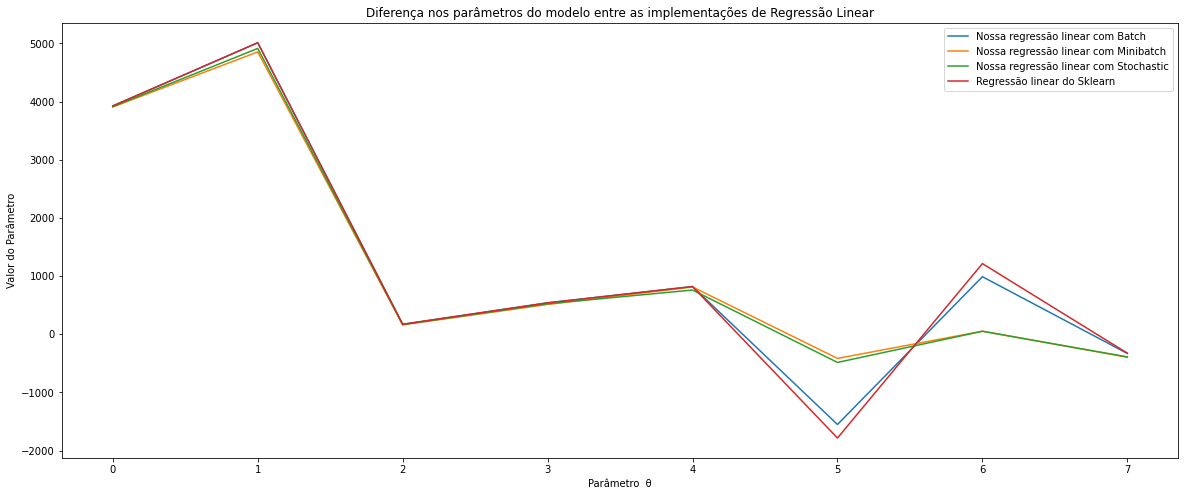

time: 532 ms


In [37]:
plt.figure(figsize=(20,8))
lr_theta = lr.coef_
lr_theta[0] = lr.intercept_
plt.plot(model_b.theta, label="Nossa regressão linear com Batch")
plt.plot(model_mb.theta,label="Nossa regressão linear com Minibatch")
plt.plot(model_st.theta,label="Nossa regressão linear com Stochastic")
plt.plot(lr.coef_, label="Regressão linear do Sklearn")
plt.legend()
plt.xlabel('Parâmetro  θ')
plt.ylabel('Valor do Parâmetro')
plt.title('Diferença nos parâmetros do modelo entre as implementações de Regressão Linear')

1.9 **Conclusões**

Definir o learning rate foi um passo importante para a performance do modelo, pois valores altos podem gerar divergência na busca pelos parâmetros que fazem a função de custo alcançar o mínimo global, impossibilitando o modelo de aprender o suficiente. Por outro lado, valores muito pequenos podem fazer com que a descida do gradiente demore a convergir, aumentando o tempo de execução. Na prática, o mínimo global pode não ser alcançado, pois a descida do gradiente é limitada ao número de épocas. Logo, concluímos que quanto menor o learning rate, mais épocas precisaremos para treinar o nosso modelo.

Concordamos que a melhor técnica de Descida do Gradiente para nosso modelo é o Mini-batch. Apesar do r2 score do modelo com minibatch ter sido um pouco menor do que o Batch, a técnica é muito mais rápida visto que a partir de 7º épocas a função de custo se mantém constante. Além disso, é eficaz na convergência e não gera underfitting, nem overtting, visto que o erro de treinamento e validação decaem com o passar das iterações. Além disso, este modelo gerou parâmetros e acertos bem próximos da regressão linear implementada com o Sklearn, como pode ser visto no gráfico acima.

## 2
(2 points) Sometimes, we need some more complex function to make good prediction. Devise and test more complex model. 


## Regressão Polinomial

2.1 **Pré-processamento de dados**

Primeiramente, observamos que as features features carat, x, y, e z possuem um comportamento possivelmente quadrático com relação ao preço, e por isso escolhemos elevá-las ao quadrado e adicioná-las ao conjunto de features utilizadas, mantendo as outras features que foram usadas no modelo de regressão linear. Com essa adição, podemos criar um polinômio de segundo grau em algumas features e utilizar a mesma classe de regressão linear criada anteriormente. 
Além disso, precisamos padronizar as features devido a um problema de overflow com valores infinitos na hora do treinamento. Para realizamos uma função mais complexa, escolhemos o tipo Mini-batch para nossa Descida de Gradiente.


In [48]:
# Criando um novo dataset
dt = dfnew.copy()

time: 0 ns


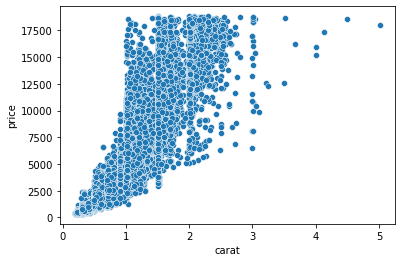

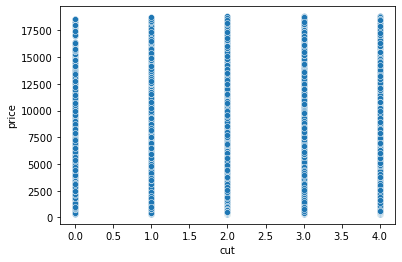

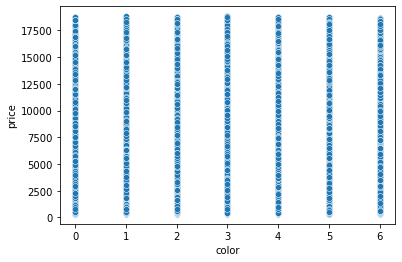

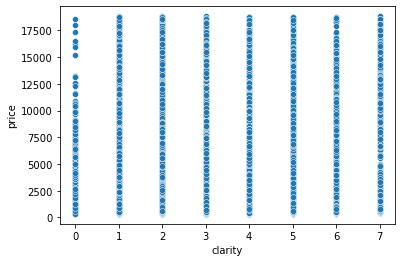

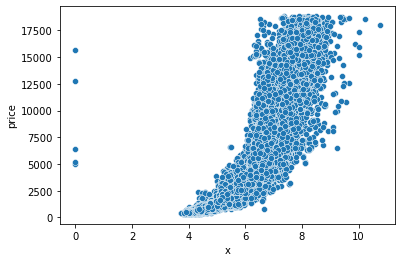

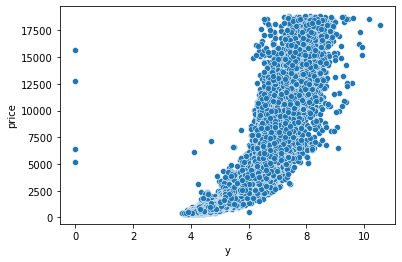

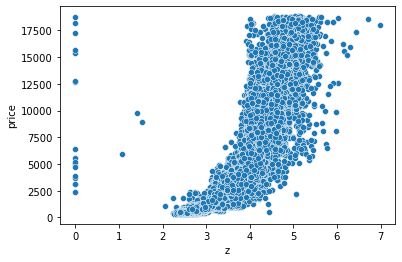

time: 4.06 s


In [50]:
for i in range(dt.values.shape[1] - 2):
    sns.scatterplot(x=dt.iloc[:,i+1], y = dt['price'])
    plt.show()

In [21]:
# Para a regressão polinomial, elevamos as colunas carat, x, y e z ao quadrado
dt['carat2'] = dt['carat']*dt['carat']
dt['x2'] = dt['x']*dt['x']
dt['y2'] = dt['y']*dt['y']
dt['z2'] = dt['z']*dt['z']

time: 7.78 ms


In [22]:
# Reorganizando as colunas do dataset
dt = dt[['x0', 'carat', 'cut', 'color', 'clarity',  'x', 'y', 'z', 'carat2', 'x2', 'y2', 'z2', 'price']]

time: 240 ms


In [23]:
dt.head()

,x0,carat,cut,color,clarity,x,y,z,carat2,x2,y2,z2,price
0,1,1.62,4,1,3,7.53,7.58,4.69,2.6244,56.7009,57.4564,21.9961,10501
1,1,0.30,3,3,2,4.39,4.35,2.57,0.0900,19.2721,18.9225,6.6049,574
2,1,1.37,4,4,4,7.28,7.22,4.32,1.8769,52.9984,52.1284,18.6624,11649
3,1,0.33,0,2,5,4.40,4.32,2.84,0.1089,19.3600,18.6624,8.0656,922
4,1,0.32,2,4,3,4.43,4.48,2.62,0.1024,19.6249,20.0704,6.8644,602


time: 103 ms


In [24]:
# Transformando dt em array
data_tablep = dt.to_numpy()

#  Reorganizando todas as colunas, exceto price, em um array x_data, e a coluna price para um array y_data
#  x_data = X (slide)
x_datap = data_tablep[:,:data_tablep.shape[1]-1]
y_datap = data_tablep[:,data_tablep.shape[1]-1]

time: 104 ms


In [25]:
# Dividindo conjunto de treinos e validação
X_trainp, X_vadp, y_trainp, y_vadp = train_test_split(x_datap, y_datap, test_size=0.33, random_state=42)

time: 103 ms


In [26]:
# Normalizando os dados
scaler_poly = StandardScaler()
X_trainp[:,1:] = scaler_poly.fit_transform(X_trainp[:,1:])
X_vadp[:,1:] = scaler_poly.transform(X_vadp[:,1:])

time: 153 ms


2.2 **Treinamento e Validação**

Após o tratamento de dados, enviamos os dados para myLinearRegression(), como apresentado a seguir:

In [27]:
# Mini Batch
model_poly = myLinearRegression(GD='minibatch', epochs=50, validation=True, X_vad = X_vadp, y_vad=y_vadp)
model_poly.fit(X_trainp, y_trainp)
y_predicted_p = model_poly.predict(X_vadp)

print('Theta values:')
print(model_poly.theta)
print('')

rmse = mean_squared_error(y_vadp, y_predicted_p)
r2 = r2_score(y_vadp, y_predicted_p)
print('Root mean squared error:', rmse)
print('R2 score:', r2)

Theta values:
[ 3943.00421342  3963.68751142   152.04747511   536.59841882
   791.42987119 -2757.73525385 -2025.22767226 -1321.0058933
 -1080.03915277  1797.07335651  3769.96639708  1724.21039265]

Root mean squared error: 1405640.218019906
R2 score: 0.9121481771993681
time: 48.2 s


2.3 **Função de Custo x Erro da Validação**

O gráfico abaixo mostra o Erro da Validação em relação à Função de Custo para nossa regressão polinomial.

Text(0.5, 1.0, 'Diferença nos parâmetros do modelo entre as Regressão Linear x Polinomial')

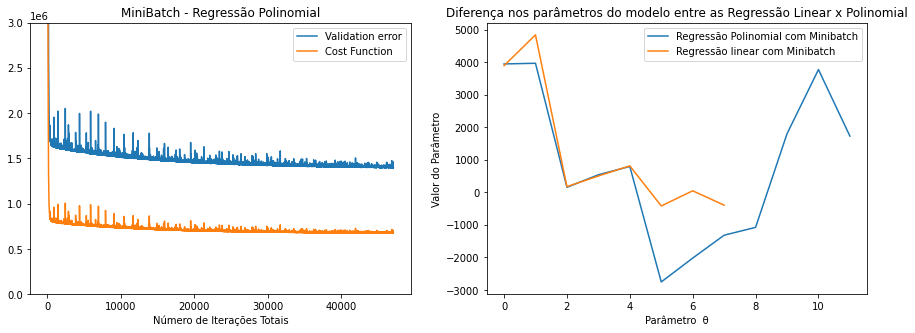

time: 396 ms


In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.plot(model_poly.vad_error, label="Validation error")
ax1.plot(model_poly.cost, label = "Cost Function")
ax1.legend()
ax1.set_title('MiniBatch - Regressão Polinomial')
ax1.set_ylim([0, 3000000])
ax1.set_xlabel('Número de Iterações Totais')


ax2.plot(model_poly.theta, label="Regressão Polinomial com Minibatch")
ax2.plot(model_mb.theta,label="Regressão linear com Minibatch")
plt.legend()
plt.xlabel('Parâmetro  θ')
plt.ylabel('Valor do Parâmetro')
plt.title('Diferença nos parâmetros do modelo entre as Regressão Linear x Polinomial')

2.4 **Conclusões**

Utilizamos a descida do gradiente Mini-batch tanto na regressão linear quanto na polinomial, e pudemos perceber que a polinomial possui um resultado levemente melhor em relação ao linear, porém a diferença entre ambos é sutil. No entanto, para implementar esta função utilizamos 4 features a mais e um número maior de épocas, aumentando a complexidade do modelo, de modo a não ter tanto impacto na performance. Além disso, é importante ressaltar que o mini-batch posssui um fator de aleatoriedade em seu algoritmo, o que pode fazer com que este resultado tenha variações. Apesar disso, concluímos que devido a complexidade de ambos os modelos, a regressão linear é mais adequada ao problema.

Também não foi necessário utilizar regularização na regressão polinomial, visto que não ocorreu overfitting. 

# 3

(1 point) Plot the cost function vs. number of iterations in the training set and analyze the model complexity. 

(0.0, 3000000.0)

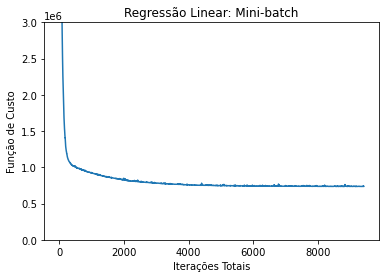

time: 328 ms


In [51]:
plt.plot(model_mb.cost)
plt.title('Regressão Linear: Mini-batch')
plt.xlabel('Iterações Totais')
plt.ylabel('Função de Custo')
plt.ylim([0, 3000000])

3.1 **What are the conclusions? What are the actions after such analyses?**

Iremos analisar a complexidade do modelo escolhido: 
- Regressão linear
- Gradiente Descendente com MiniBatch 
- Número de Features: 7
- Learning Rate: 0.01
- Número de Épocas: 10
- Batch Size: 32

Dado que o número total de features do problema eram 9, utilizar 7 delas no nosso modelo o torna representativo para o conjunto de dados. Além disso, nossa hipótese é simples, com um número pequeno de parâmetros. Desta forma, conseguimos encontrar os melhores parâmetros que minimizam a função de custo com poucas épocas ou iterações totais. O grandiente descendente utilizando batch de 32 amostras se mostrou eficiente. Além disso, vimos que neste caso um modelo mais complexo não tem tanta contribuição no ajuste aos dados. Logo, podemos concluir que o modelo proposto parece generalizar bem aos dados do problema, sem se ajustar demais aos dados de treinamento. Apesar das variações na função de custo e erro de validação devido a aleatoridade no treinamento, com o número de épocas que escolhemos, vemos que estas variações tendem a diminuir.

Feita esta análise, as próximas ações que realizaríamos seria a validação cruzada. Como a divisão dos conjuntos treino e validação foram feitas no começo do tratamento de dados, rearranjaríamos algumas vezes os dados de ambos os conjuntos, gerando novos conjuntos de treino e validação. Assim, poderíamos observar a eficácia do modelo, e verificar se o seu comportamento continua o mesmo e garantir que o modelo não se ajusta demais aos dados. Depois de analisar o comportamento de todos os modelos, poderíamos escolher os hiper-parâmetros finais e treinar o modelo final com todos os dados. Finalmente, poderíamos testar com os dados de teste e medir a eficácia do nosso modelo na generalização do problema.

# 4
(3 points) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. You should implement your solutions. What are the conclusions?


4.1 **Testando diferentes learning rates**

Escolhemos o mini-batch para rodar com 5 valores distintos de learning rate: 0.1, 0.01, 0.001, 0.0001 e 0.00001. Como discutimos na questão 1, quando treinamos o modelo precisamos considerar a relação entre os valores do learning rate e do número total de épocas, pois quanto menor o learning rate maior deve ser o número de épocas. Assim, embora na questão 1 treinamos nosso modelo com 10 épocas, aqui usaremos um valor maior, para que learning rate pequenos não sejam prejudicados. 

In [14]:
# TODO: Gradient Descent (GD) with different learning rates. Implement your solution. You cannot use scikit-learn libraries.

lr_values = [0.1, 0.01, 0.001, 0.0001, 0.00001]
info_model = []
for i in range(len(lr_values)):
    model_mb = myLinearRegression(GD='minibatch', epochs=10, validation=True, X_vad = X_vad, y_vad=y_vad, learning_rate = lr_values[i])
    model_mb.fit(X_train, y_train)
    info_model.append([lr_values[i], model_mb.cost, model_mb.vad_error])
    print('Learning rate: ', lr_values[i])
    print('Theta values: ', model_mb.theta)
    print('')

Learning rate:  0.1
Theta values:  [ 3914.76420619  5068.93367168   149.08704966   552.44426767
   793.50655089 -1516.96700192   985.78171974  -377.77530863]

Learning rate:  0.01
Theta values:  [3936.7227668  4848.4320902   155.72546231  549.75013236  820.74656029
 -407.59411038   66.64063707 -385.86861828]

Learning rate:  0.001
Theta values:  [3922.37295367 2135.98869696  159.49046866  472.25633344  870.46037237
  676.33049664  729.57487133  529.68176427]

Learning rate:  0.0001
Theta values:  [2394.44832144 1024.11719124   93.11092788   66.04647173  279.95183459
  863.98928786  872.21130604  834.98993895]

Learning rate:  1e-05
Theta values:  [352.7682904  290.00189342 -11.80102236 -46.71992542 -32.87616422
 275.58462268 276.40052825 271.31297758]

time: 1min 43s


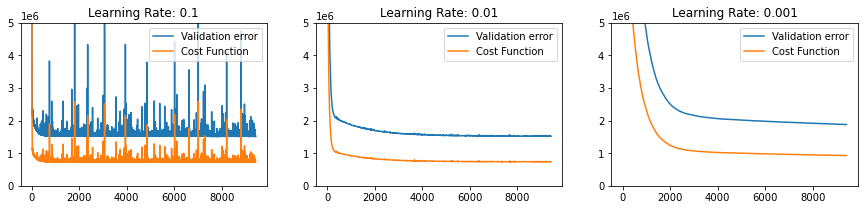

time: 1.19 s


In [15]:
info_model = np.array(info_model, dtype=object)
fig, ax = plt.subplots(1,3 , figsize=(15,3))

for i in range(3):
    ax[i].plot(info_model[i][2], label="Validation error")
    ax[i].plot(info_model[i][1], label = "Cost Function")
    ax[i].legend()
    ax[i].set_title('Learning Rate: '+ str(info_model[i][0]))
    ax[i].set_ylim([0, 5000000])

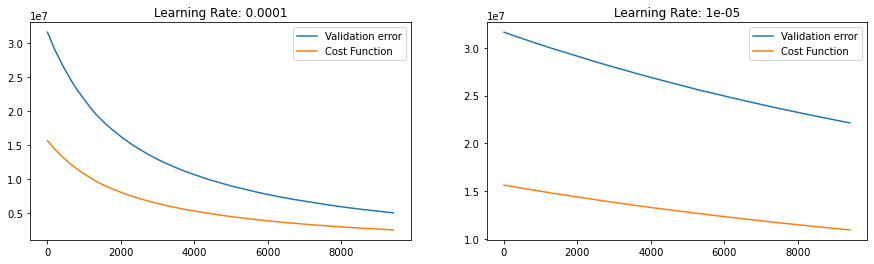

time: 640 ms


In [16]:
fig, ax = plt.subplots(1,2 , figsize=(15,4))

for j in range(2):
    i = 3 + j
    ax[j].plot(info_model[i][2], label="Validation error")
    ax[j].plot(info_model[i][1], label = "Cost Function")
    ax[j].legend()
    ax[j].set_title('Learning Rate: '+ str(info_model[i][0]))
#    ax[j].set_ylim([0, 8000000])

4.2 **Equação Normal**

In [24]:
# TODO: Compare the GD-based solutions (e.g., Batch, SGD, Mini-batch) with Normal Equation. Implement your solution. You cannot use scikit-learn libraries.

# matriz transposta de X
xt = np.transpose(X_train)

# (X^T X)^(-1)
from numpy.linalg import inv
xtx_inverse = inv(np.dot(xt, X_train))

# (X^T X)^(-1) X^T y 
theta_norm = np.dot(np.dot(xtx_inverse, xt), y_train)

print('Theta values - Normal Equation:')
print(theta_norm)


Theta values - Normal Equation:
[ 3924.03250415  5011.56955834   170.59516023   539.12967742
   818.22207679 -1784.82393686  1213.73393293  -325.68639698]
time: 16 ms


In [25]:
y_predict_normal = np.dot(X_vad, np.transpose(theta_norm))
rmse = mean_squared_error(y_vad, y_predict_normal)
r2 = r2_score(y_vad, y_predict_normal)
rmse, r2

(1509012.3879252572, 0.9056874673842815)

time: 15 ms


Text(0.5, 1.0, 'Diferença nos parâmetros do modelo entre as Regressão Linear x Equação Normal')

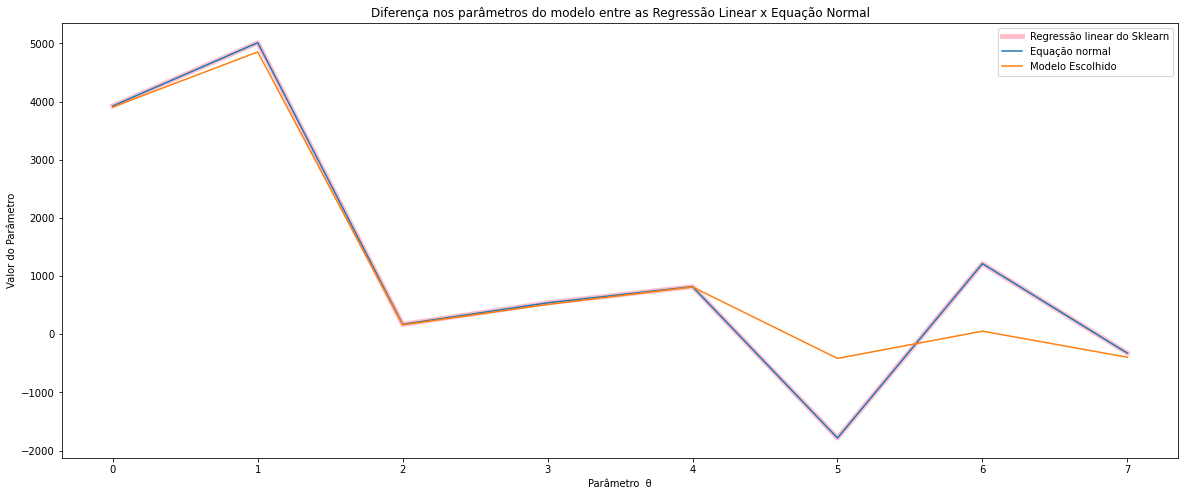

time: 578 ms


In [46]:
plt.figure(figsize=(20,8))
plt.plot(lr.coef_, label="Regressão linear do Sklearn", LineWidth=5, color='pink')
plt.plot(theta_norm, label="Equação normal")
plt.plot(model_mb.theta,label="Modelo Escolhido")
plt.legend()
plt.xlabel('Parâmetro  θ')
plt.ylabel('Valor do Parâmetro')
plt.title('Diferença nos parâmetros do modelo entre as Regressão Linear x Equação Normal')

4.3 **What are the conclusions?**

Considerando o número de épocas fixo em 10, observamos que para que o gradiente consiga convergir de forma adequada, os melhores learning rates são: 0.01 e 0.001. No gráfico acima, a função de custo e erro de validação varia muito para 0.1 e não chega a convergir para 0.0001 e 0.00001, gerando possíveis underfitting. Desta forma, acreditamos que para esse número de épocas fizemos uma escolha adequada para o learning rate. 

Em relação a hipótese gerada pela equação normal, vimos que os parâmetros gerados por esta técnica são exatamente iguais aos parâmetros gerados no modelo da regressão linear com Sklearn, explicando a rapidez do modelo em encontrar os parâmetros de forma direta, em vez de utilizar a descida do gradiente. Agora, em relação aos parâmetros obtidos no modelo escolhido, vemos que a equação normal gera valores próximos em sua maioria. Portanto, utilizar a regressão linear com a equação normal gera uma hipótese que consegue se ajustar de forma adequada aos dados e de forma muito mais rápida. 